In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table

In [17]:
file_path = "/global/cfs/projectdirs/desi/users/zhouc/desi_lsb/data/combined_sample.fits"

In [18]:
bgs_cat = Table.read(file_path)

In [19]:
bgs_cat

TARGETID_1,Z_1,NTILE,RA,DEC,PHOTSYS,FRAC_TLOBS_TILES,WEIGHT_ZFAIL,BITWEIGHTS,PROB_OBS,WEIGHT,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,TARGETID_2,SURVEY,PROGRAM,HEALPIX,Z_2,COEFF,RCHI2,RCHI2_CONT,RCHI2_PHOT,SNR_B,SNR_R,SNR_Z,SMOOTHCORR_B,SMOOTHCORR_R,SMOOTHCORR_Z,VDISP,VDISP_IVAR,AV,AGE,ZZSUN,LOGMSTAR,SFR,DN4000,DN4000_OBS,DN4000_IVAR,DN4000_MODEL,FLUX_SYNTH_G,FLUX_SYNTH_R,FLUX_SYNTH_Z,FLUX_SYNTH_SPECMODEL_G,FLUX_SYNTH_SPECMODEL_R,FLUX_SYNTH_SPECMODEL_Z,FLUX_SYNTH_PHOTMODEL_G,FLUX_SYNTH_PHOTMODEL_R,FLUX_SYNTH_PHOTMODEL_Z,FLUX_SYNTH_PHOTMODEL_W1,FLUX_SYNTH_PHOTMODEL_W2,FLUX_SYNTH_PHOTMODEL_W3,FLUX_SYNTH_PHOTMODEL_W4,ABSMAG10_DECAM_G,ABSMAG10_IVAR_DECAM_G,KCORR10_DECAM_G,ABSMAG10_DECAM_R,ABSMAG10_IVAR_DECAM_R,KCORR10_DECAM_R,ABSMAG10_DECAM_Z,ABSMAG10_IVAR_DECAM_Z,KCORR10_DECAM_Z,ABSMAG00_U,ABSMAG00_IVAR_U,KCORR00_U,ABSMAG00_B,ABSMAG00_IVAR_B,KCORR00_B,ABSMAG00_V,ABSMAG00_IVAR_V,KCORR00_V,ABSMAG01_SDSS_U,ABSMAG01_IVAR_SDSS_U,KCORR01_SDSS_U,ABSMAG01_SDSS_G,ABSMAG01_IVAR_SDSS_G,KCORR01_SDSS_G,ABSMAG01_SDSS_R,ABSMAG01_IVAR_SDSS_R,KCORR01_SDSS_R,ABSMAG01_SDSS_I,ABSMAG01_IVAR_SDSS_I,KCORR01_SDSS_I,ABSMAG01_SDSS_Z,ABSMAG01_IVAR_SDSS_Z,KCORR01_SDSS_Z,ABSMAG01_W1,ABSMAG01_IVAR_W1,KCORR01_W1,LOGLNU_1500,LOGLNU_2800,LOGL_1450,LOGL_1700,LOGL_3000,LOGL_5100,FLYA_1215_CONT,FOII_3727_CONT,FHBETA_CONT,FOIII_5007_CONT,FHALPHA_CONT,RCHI2_LINE,DELTA_LINECHI2,DELTA_LINENDOF,APERCORR,APERCORR_G,APERCORR_R,APERCORR_Z,NARROW_Z,NARROW_ZRMS,BROAD_Z,BROAD_ZRMS,UV_Z,UV_ZRMS,NARROW_SIGMA,NARROW_SIGMARMS,BROAD_SIGMA,BROAD_SIGMARMS,UV_SIGMA,UV_SIGMARMS,MGII_DOUBLET_RATIO,OII_DOUBLET_RATIO,SII_DOUBLET_RATIO,LYALPHA_MODELAMP,LYALPHA_AMP,LYALPHA_AMP_IVAR,LYALPHA_FLUX,LYALPHA_FLUX_IVAR,LYALPHA_BOXFLUX,LYALPHA_BOXFLUX_IVAR,LYALPHA_VSHIFT,LYALPHA_SIGMA,LYALPHA_CONT,LYALPHA_CONT_IVAR,LYALPHA_EW,LYALPHA_EW_IVAR,LYALPHA_FLUX_LIMIT,LYALPHA_EW_LIMIT,LYALPHA_CHI2,LYALPHA_NPIX,OI_1304_MODELAMP,OI_1304_AMP,OI_1304_AMP_IVAR,OI_1304_FLUX,OI_1304_FLUX_IVAR,OI_1304_BOXFLUX,OI_1304_BOXFLUX_IVAR,OI_1304_VSHIFT,OI_1304_SIGMA,OI_1304_CONT,OI_1304_CONT_IVAR,OI_1304_EW,OI_1304_EW_IVAR,OI_1304_FLUX_LIMIT,OI_1304_EW_LIMIT,OI_1304_CHI2,OI_1304_NPIX,SILIV_1396_MODELAMP,SILIV_1396_AMP,SILIV_1396_AMP_IVAR,SILIV_1396_FLUX,SILIV_1396_FLUX_IVAR,SILIV_1396_BOXFLUX,SILIV_1396_BOXFLUX_IVAR,SILIV_1396_VSHIFT,SILIV_1396_SIGMA,SILIV_1396_CONT,SILIV_1396_CONT_IVAR,SILIV_1396_EW,SILIV_1396_EW_IVAR,SILIV_1396_FLUX_LIMIT,SILIV_1396_EW_LIMIT,SILIV_1396_CHI2,SILIV_1396_NPIX,CIV_1549_MODELAMP,CIV_1549_AMP,CIV_1549_AMP_IVAR,CIV_1549_FLUX,CIV_1549_FLUX_IVAR,CIV_1549_BOXFLUX,CIV_1549_BOXFLUX_IVAR,CIV_1549_VSHIFT,CIV_1549_SIGMA,CIV_1549_CONT,CIV_1549_CONT_IVAR,CIV_1549_EW,CIV_1549_EW_IVAR,CIV_1549_FLUX_LIMIT,CIV_1549_EW_LIMIT,CIV_1549_CHI2,CIV_1549_NPIX,HEII_1640_MODELAMP,HEII_1640_AMP,HEII_1640_AMP_IVAR,HEII_1640_FLUX,HEII_1640_FLUX_IVAR,HEII_1640_BOXFLUX,HEII_1640_BOXFLUX_IVAR,HEII_1640_VSHIFT,HEII_1640_SIGMA,HEII_1640_CONT,HEII_1640_CONT_IVAR,HEII_1640_EW,HEII_1640_EW_IVAR,HEII_1640_FLUX_LIMIT,HEII_1640_EW_LIMIT,HEII_1640_CHI2,HEII_1640_NPIX,ALIII_1857_MODELAMP,ALIII_1857_AMP,ALIII_1857_AMP_IVAR,ALIII_1857_FLUX,ALIII_1857_FLUX_IVAR,ALIII_1857_BOXFLUX,ALIII_1857_BOXFLUX_IVAR,ALIII_1857_VSHIFT,ALIII_1857_SIGMA,ALIII_1857_CONT,ALIII_1857_CONT_IVAR,ALIII_1857_EW,ALIII_1857_EW_IVAR,ALIII_1857_FLUX_LIMIT,ALIII_1857_EW_LIMIT,ALIII_1857_CHI2,ALIII_1857_NPIX,SILIII_1892_MODELAMP,SILIII_1892_AMP,SILIII_1892_AMP_IVAR,SILIII_1892_FLUX,SILIII_1892_FLUX_IVAR,SILIII_1892_BOXFLUX,SILIII_1892_BOXFLUX_IVAR,SILIII_1892_VSHIFT,SILIII_1892_SIGMA,SILIII_1892_CONT,SILIII_1892_CONT_IVAR,SILIII_1892_EW,SILIII_1892_EW_IVAR,SILIII_1892_FLUX_LIMIT,SILIII_1892_EW_LIMIT,SILIII_1892_CHI2,SILIII_1892_NPIX,CIII_1908_MODELAMP,CIII_1908_AMP,CIII_1908_AMP_IVAR,CIII_1908_FLUX,CIII_1908_FLUX_IVAR,CIII_1908_BOXFLUX,CIII_1908_BOXFLUX_IVAR,CIII_1908_VSHIFT,CIII_1908_SIGMA,CIII_1908_CONT,CIII_1908_CONT_IVAR,CIII_1908_EW,CIII_1908_EW_IVAR,CIII_1908_FLUX_LIMIT,CIII_1908_EW_LIMIT,CIII_1908_CHI2,CIII_1

In [20]:
mstar_mask = bgs_cat['LOGMSTAR'] > 11.0 
z_mask = (bgs_cat['Z'] >= 0.1) & (bgs_cat['Z'] <= 0.4)
bgs_sub = bgs_cat[mstar_mask & z_mask]
print(len(bgs_sub))

509851


(array([3.86616e+05, 1.08148e+05, 1.40420e+04, 9.57000e+02, 6.80000e+01,
        1.20000e+01, 6.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([11.00000095, 11.26985645, 11.53971195, 11.80956745, 12.07942295,
        12.34927845, 12.61913395, 12.88898945, 13.15884495, 13.42870045,
        13.69855595]),
 <BarContainer object of 10 artists>)

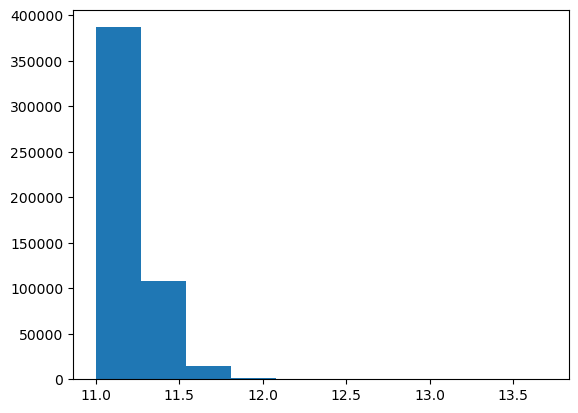

In [21]:
plt.hist(bgs_cat['LOGMSTAR'])

In [22]:
def flux_to_mag(flux):
    return (-5/2)*np.log10(flux) + 22.5

def mag_to_flux(mag):
    return 10**((2/5)* (22.5 - mag))

bgs_cat["MAG_R_DERED"] = flux_to_mag(bgs_cat["flux_r_dered"])
bgs_cat["mag_g_dered"] = flux_to_mag(bgs_cat["flux_g_dered"])
bgs_cat["mag_z_dered"] = flux_to_mag(bgs_cat["flux_z_dered"])
bgs_cat["Z_BEST"] = bgs_cat["Z_1"]
bgs_cat["ID_S16A"] = bgs_cat["TARGETID_1"]
bgs_cat["GCMODEL_MAG"] = bgs_cat["mag_g_dered"]
# bgs_cat["ra"] = bgs_cat["RA"]
# bgs_cat["dec" ] = bgs_cat["DEC"]
COLUMNS = ["ID_S16A", "RA", "DEC", "Z_BEST", "GCMODEL_MAG", "LOGMSTAR"]
bgs_cat = bgs_cat[COLUMNS]

In [23]:
# Assuming your table is named bgs_cat and column is LOGMSTAR
logmstar_values = bgs_cat['LOGMSTAR']

# Compute quantile boundaries for splitting into 5 groups (quintiles)
quantiles = np.quantile(logmstar_values, [0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Create masks and split the table
tables = []
for i in range(5):
    mask = (logmstar_values >= quantiles[i]) & (logmstar_values <= quantiles[i+1])
    tables.append(bgs_cat[mask])

# tables[0], tables[1], tables[2], tables[3], tables[4] are your quintile-based tables

In [24]:
save_path_list = [f"/global/cfs/projectdirs/desi/users/zhouc/decals_lsb_production/input_catalogs/{i}/s16a_massive_z_0.5_logm_11.4_decals_full_fdfc_bsm_ell.fits" for i in range(5)]
for i, table in enumerate(tables):
    table.write(save_path_list[i], format='fits', overwrite=True)
    print(f"Saved table {i} to {save_path_list[i]}")
    print(len(table))

Saved table 0 to /global/cfs/projectdirs/desi/users/zhouc/decals_lsb_production/input_catalogs/0/s16a_massive_z_0.5_logm_11.4_decals_full_fdfc_bsm_ell.fits
101971
Saved table 1 to /global/cfs/projectdirs/desi/users/zhouc/decals_lsb_production/input_catalogs/1/s16a_massive_z_0.5_logm_11.4_decals_full_fdfc_bsm_ell.fits
101975
Saved table 2 to /global/cfs/projectdirs/desi/users/zhouc/decals_lsb_production/input_catalogs/2/s16a_massive_z_0.5_logm_11.4_decals_full_fdfc_bsm_ell.fits
101971
Saved table 3 to /global/cfs/projectdirs/desi/users/zhouc/decals_lsb_production/input_catalogs/3/s16a_massive_z_0.5_logm_11.4_decals_full_fdfc_bsm_ell.fits
101972
Saved table 4 to /global/cfs/projectdirs/desi/users/zhouc/decals_lsb_production/input_catalogs/4/s16a_massive_z_0.5_logm_11.4_decals_full_fdfc_bsm_ell.fits
101971
